In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

***reading in country data***

In [2]:
odcountry=pd.read_csv(r'C:\Users\Thund\NSS_Data_Analytics\Projects\Capstone\overdose\data\VSRR_Provisional_Drug_Overdose_Death_Counts.csv')
odcountry=odcountry.drop(columns=['Footnote','Footnote Symbol'])

In [3]:
#Subsetting data to December to get the data only for the listed year
#Excluding US to stop it from influencing data analysis
yearly_od=odcountry.loc[odcountry['Month']=='December']
yearly_od=yearly_od.loc[yearly_od['State']!='US']

In [4]:
#investigating to see if all years are equally represented
years_od=yearly_od.groupby('Year')['Year'].count()
years_od

Year
2015    597
2016    597
2017    597
2018    597
2019    597
2020    597
2021    597
2022    597
Name: Year, dtype: int64

In [5]:
#Looking at TN specifically to compare numbers to other data set from other notebook
tn=yearly_od.loc[yearly_od['State']=='TN']
tn

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Predicted Value
50109,TN,2015,December,12 month-ending,Number of Deaths,"70,237",100,0.290445,Tennessee,NaN
50110,TN,2015,December,12 month-ending,Cocaine (T40.5),196,100,0.290445,Tennessee,203
50111,TN,2015,December,12 month-ending,"Opioids (T40.0-T40.4,T40.6)","1,040",100,0.290445,Tennessee,"1,074"
50112,TN,2015,December,12 month-ending,Natural & semi-synthetic opioids (T40.2),652,100,0.290445,Tennessee,673
50113,TN,2015,December,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",854,100,0.290445,Tennessee,884
...,...,...,...,...,...,...,...,...,...,...
51124,TN,2022,December,12 month-ending,Natural & semi-synthetic opioids (T40.2),462,100,0.108313,Tennessee,468
51125,TN,2022,December,12 month-ending,Cocaine (T40.5),729,100,0.108313,Tennessee,739
51126,TN,2022,December,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)","2,863",100,0.108313,Tennessee,"2,898"
51127,TN,2022,December,12 month-ending,Psychostimulants with abuse potential (T43.6),"1,571",100,0.108313,Tennessee,"1,594"


In [6]:
#Narrowing down to just the number of deaths per state and converting that to a numeric column and setting it as a new column
#in the dataframe. Then dropping unneeded columns
specified_deaths=yearly_od[yearly_od['Indicator']=='Number of Drug Overdose Deaths']
numeric=[x.replace(',','') for x in specified_deaths['Data Value']]
specified_deaths['data']=pd.to_numeric(numeric)
specified_deaths=specified_deaths.drop(columns=['Month','Period', 'Percent Complete','State','Predicted Value','Data Value'])
specified_deaths

C:\Users\Thund\AppData\Local\Temp\ipykernel_20384\1747168376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified_deaths['data']=pd.to_numeric(numeric)


,Year,Indicator,Percent Pending Investigation,State Name,data
29,2015,Number of Drug Overdose Deaths,0.000000,Alaska,121
172,2016,Number of Drug Overdose Deaths,0.068886,Alaska,129
321,2017,Number of Drug Overdose Deaths,0.000000,Alaska,141
459,2018,Number of Drug Overdose Deaths,0.000000,Alaska,105
608,2019,Number of Drug Overdose Deaths,0.000000,Alaska,133
...,...,...,...,...,...
63144,2018,Number of Drug Overdose Deaths,0.052650,New York City,1482
63293,2019,Number of Drug Overdose Deaths,0.086142,New York City,1548
63432,2020,Number of Drug Overdose Deaths,0.084000,New York City,2131
63575,2021,Number of Drug Overdose Deaths,0.081824,New York City,2775


In [82]:
#looking at total deaths by state and resetting it to a dataframe
state_group=specified_deaths.groupby('State Name')['data'].sum().sort_values(ascending=False).reset_index(name='total_deaths')
state_group_for_graph=state_group.head(15)

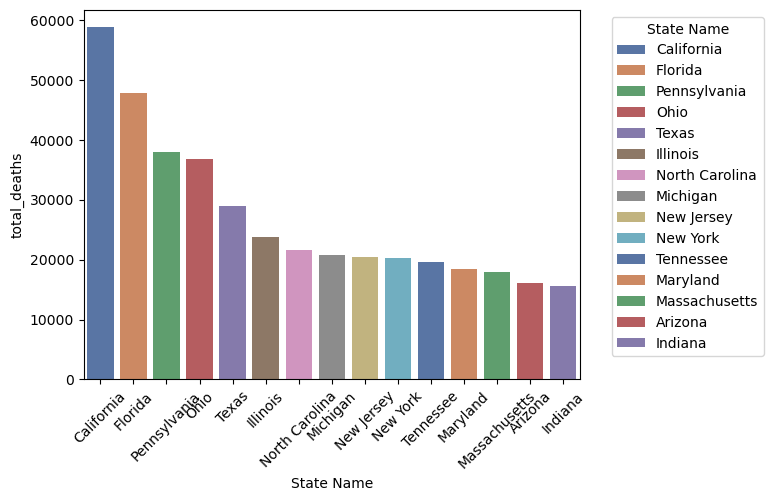

In [85]:
#Graphing the top 15 states
sns.barplot(state_group_for_graph, x='State Name', y='total_deaths', hue='State Name', palette='deep', dodge=False)
plt.xticks(rotation=45)
plt.legend(title='State Name',bbox_to_anchor=(1.05, 1))

In [9]:
#Looking at deaths over time
year_group=specified_deaths.groupby('Year')['data'].sum().sort_values(ascending=False).reset_index(name='total_deaths')
year_group

,Year,total_deaths
0,2022,109360
1,2021,107573
2,2020,92478
3,2019,71130
4,2017,70699
5,2018,67850
6,2016,63938
7,2015,52623


<Axes: xlabel='Year', ylabel='total_deaths'>

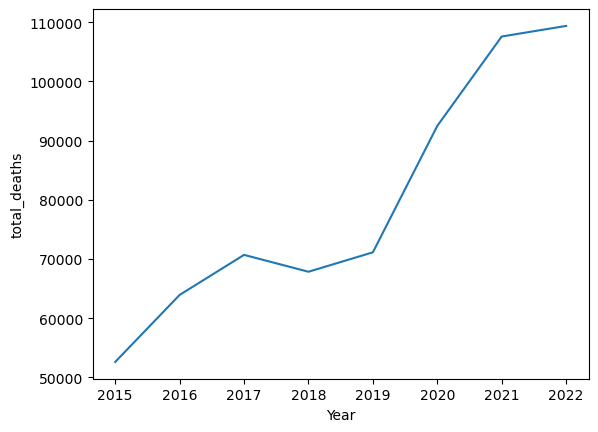

In [86]:
#Simple graph to visualize trend
sns.lineplot(year_group, x='Year', y='total_deaths')

In [10]:
#Investigating when the drug was specified and converting "Data Value" column to numeric for aggregation
specified=yearly_od[yearly_od['Indicator']=='Percent with drugs specified']
specified['data']=pd.to_numeric(specified['Data Value'])

C:\Users\Thund\AppData\Local\Temp\ipykernel_20384\2864220331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specified['data']=pd.to_numeric(specified['Data Value'])


In [11]:
#cleaning off unused columns
specified=specified.drop(columns=['Month','Period', 'Percent Complete','State','Predicted Value','Data Value'])
specified

,Year,Indicator,Percent Pending Investigation,State Name,data
35,2015,Percent with drugs specified,0.000000,Alaska,89.256198
179,2016,Percent with drugs specified,0.068886,Alaska,99.224806
323,2017,Percent with drugs specified,0.000000,Alaska,97.163121
464,2018,Percent with drugs specified,0.000000,Alaska,100.000000
602,2019,Percent with drugs specified,0.000000,Alaska,96.240601
...,...,...,...,...,...
63149,2018,Percent with drugs specified,0.052650,New York City,99.527665
63287,2019,Percent with drugs specified,0.086142,New York City,99.547804
63434,2020,Percent with drugs specified,0.084000,New York City,99.296105
63582,2021,Percent with drugs specified,0.081824,New York City,99.315315


In [75]:
#Noticed that both NY and NYC are showing up seperately in the data set, extracting both for analysis
ny_state=specified.loc[specified['State Name']=='New York'].sort_values('Year', ascending=True)
nyc=specified.loc[specified['State Name']=='New York City'].sort_values('Year', ascending=True)
print(ny_state)
print('----------------------------------------')
print(nyc)

       Year                     Indicator  Percent Pending Investigation  \
40985  2015  Percent with drugs specified                       0.405175   
41129  2016  Percent with drugs specified                       0.585222   
41273  2017  Percent with drugs specified                       0.498001   
41414  2018  Percent with drugs specified                       0.466826   
41552  2019  Percent with drugs specified                       0.703000   
41699  2020  Percent with drugs specified                       0.413829   
41847  2021  Percent with drugs specified                       0.535676   
41993  2022  Percent with drugs specified                       0.234805   

      State Name       data  
40985   New York  95.449501  
41129   New York  96.797153  
41273   New York  96.767594  
41414   New York  97.540250  
41552   New York  97.027804  
41699   New York  97.912317  
41847   New York  97.444795  
41993   New York  97.647751  
----------------------------------------
    

In [87]:
print(len(ny_state))
print(len(nyc))

8
8


In [12]:
#exporting to a csv for Power BI import
specified.to_csv('deaths_specified.csv')

In [13]:
#Investigating trends in instances where the drug was specified. 
#I take this to also imply confidence in testing for drugs in cases of overdose
percent_confidence=specified.groupby('Year')['data'].agg(np.mean).reset_index(name='average_confidence')
percent_confidence

,Year,average_confidence
0,2015,84.910679
1,2016,87.003426
2,2017,89.639843
3,2018,92.497041
4,2019,94.431969
5,2020,94.964094
6,2021,95.951369
7,2022,96.414116


In [14]:
percent_confidence_state=specified.groupby(['Year', 'State Name'])['data'].agg(np.mean).reset_index(name='average_confidence')
percent_sorted=percent_confidence_state.sort_values('average_confidence', ascending=False)
percent_sorted.head(20)

,Year,State Name,average_confidence
415,2022,Wyoming,100.000000
8,2015,District of Columbia,100.000000
250,2019,South Dakota,100.000000
279,2020,Maine,100.000000
370,2022,Connecticut,100.000000
358,2021,Vermont,100.000000
227,2019,Maine,100.000000
150,2017,Vermont,100.000000
410,2022,Vermont,100.000000
306,2020,Vermont,100.000000


<Axes: xlabel='Year', ylabel='average_confidence'>

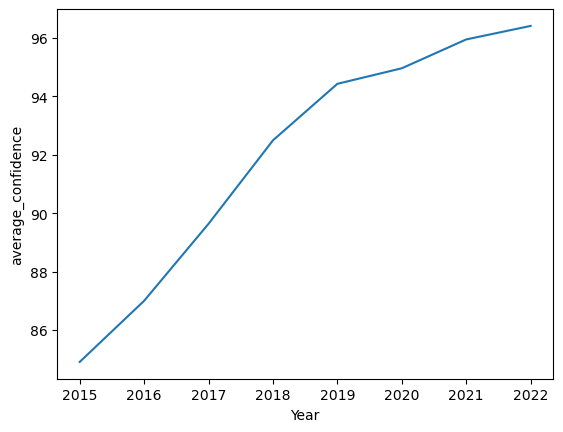

In [15]:
#graphing trend in confidence
sns.lineplot(percent_confidence, x='Year', y='average_confidence')

In [16]:
#reading in drug poisonings by state
poison=pd.read_csv(r'C:\Users\Thund\NSS_Data_Analytics\Projects\Capstone\overdose\data\NCHS_-_Drug_Poisoning_Mortality_by_State__United_States (1).csv')
poison=poison.drop(columns=['Standard Error for Crude Rate','Sex', 'Age Group','Race and Hispanic Origin','Lower Confidence Limit for Crude Rate','Upper Confidence Limit for Crude Rate','Age-adjusted Rate','Standard Error for Age-adjusted Rate','Lower Confidence Limit for Age-adjusted Rate','Upper Confidence Limit for Age-adjusted Rate','State Crude Rate in Range', 'US Age-adjusted Rate','Crude Death Rate','US Crude Rate'])
poison=poison.loc[poison['State']!='United States']
poison

,State,Year,Deaths,Population,Unit
0,Alabama,1999,169,4430143,"per 100,000 population"
1,Alabama,2000,197,4447100,"per 100,000 population"
2,Alabama,2001,216,4467634,"per 100,000 population"
3,Alabama,2002,211,4480089,"per 100,000 population"
4,Alabama,2003,197,4503491,"per 100,000 population"
...,...,...,...,...,...
2857,Wyoming,2012,98,576412,"per 100,000 population"
2858,Wyoming,2013,98,582658,"per 100,000 population"
2859,Wyoming,2014,109,584153,"per 100,000 population"
2860,Wyoming,2015,96,586107,"per 100,000 population"


In [18]:
#Looking at posionings by state
by_year=poison.groupby('State')['Deaths'].sum().sort_values(ascending=False).reset_index(name='deaths')
by_year

,State,deaths
0,California,64081
1,Florida,45598
2,Texas,37304
3,Pennsylvania,35479
4,Ohio,30643
5,New York,29750
6,Illinois,23669
7,Michigan,21816
8,North Carolina,18996
9,Massachusetts,16886


<Axes: xlabel='State', ylabel='deaths'>

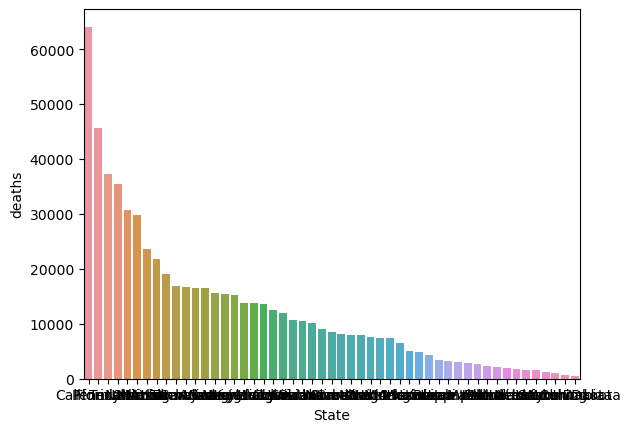

In [19]:
#just a quick graph looking at drug posionings
sns.barplot(by_year, x='State', y='deaths')

In [27]:
#year trends in poisonings
yearly_poisons=poison.groupby('Year')['Deaths'].agg(sum).reset_index(name='total_deaths')
yearly_poisons

,Year,total_deaths
0,1999,16849
1,2000,17415
2,2001,19394
3,2002,23518
4,2003,25785
5,2004,27424
6,2005,29813
7,2006,34425
8,2007,36010
9,2008,36450


<Axes: xlabel='Year', ylabel='total_deaths'>

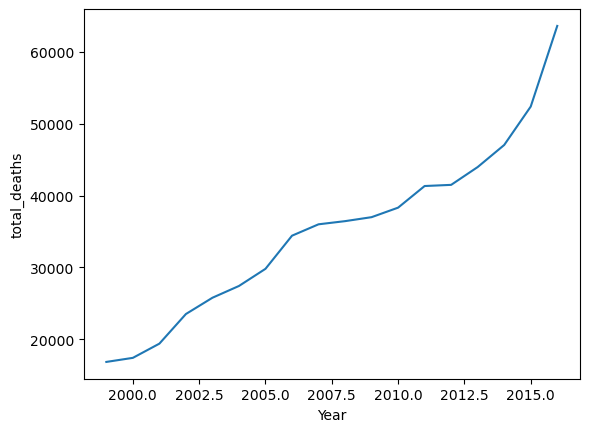

In [28]:
#visualizing the yearly posionings
sns.lineplot(yearly_poisons, x='Year', y='total_deaths')